<h1>Experiment 2 : Probablity Distrubution</h1>

<p>Pragnesh Barik - U21ME021</p>

In [1]:
import random
import math
import numpy as np
import pandas as pd
import scipy.special
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def NP_r(counter, n, trials) :
    count_dict=dict(sorted(counter.items()))
    r = np.array(list(count_dict.keys()))
    n_r = n-r
    ret_list = choose(n, r)
    return [n_r, trials*ret_list[0]*math.pow(2, -n), list(count_dict.values()), ret_list[2], ret_list[3], r]

def choose(n, r) :
    n_r = n-r
    fact_n = scipy.special.factorial(n)
    fact_n_r = scipy.special.factorial(n-r)
    fact_r=scipy.special.factorial(r)
    return [fact_n/(fact_n_r * fact_r), fact_n, fact_r, fact_n_r]

In [3]:
trials=10000
coins=100

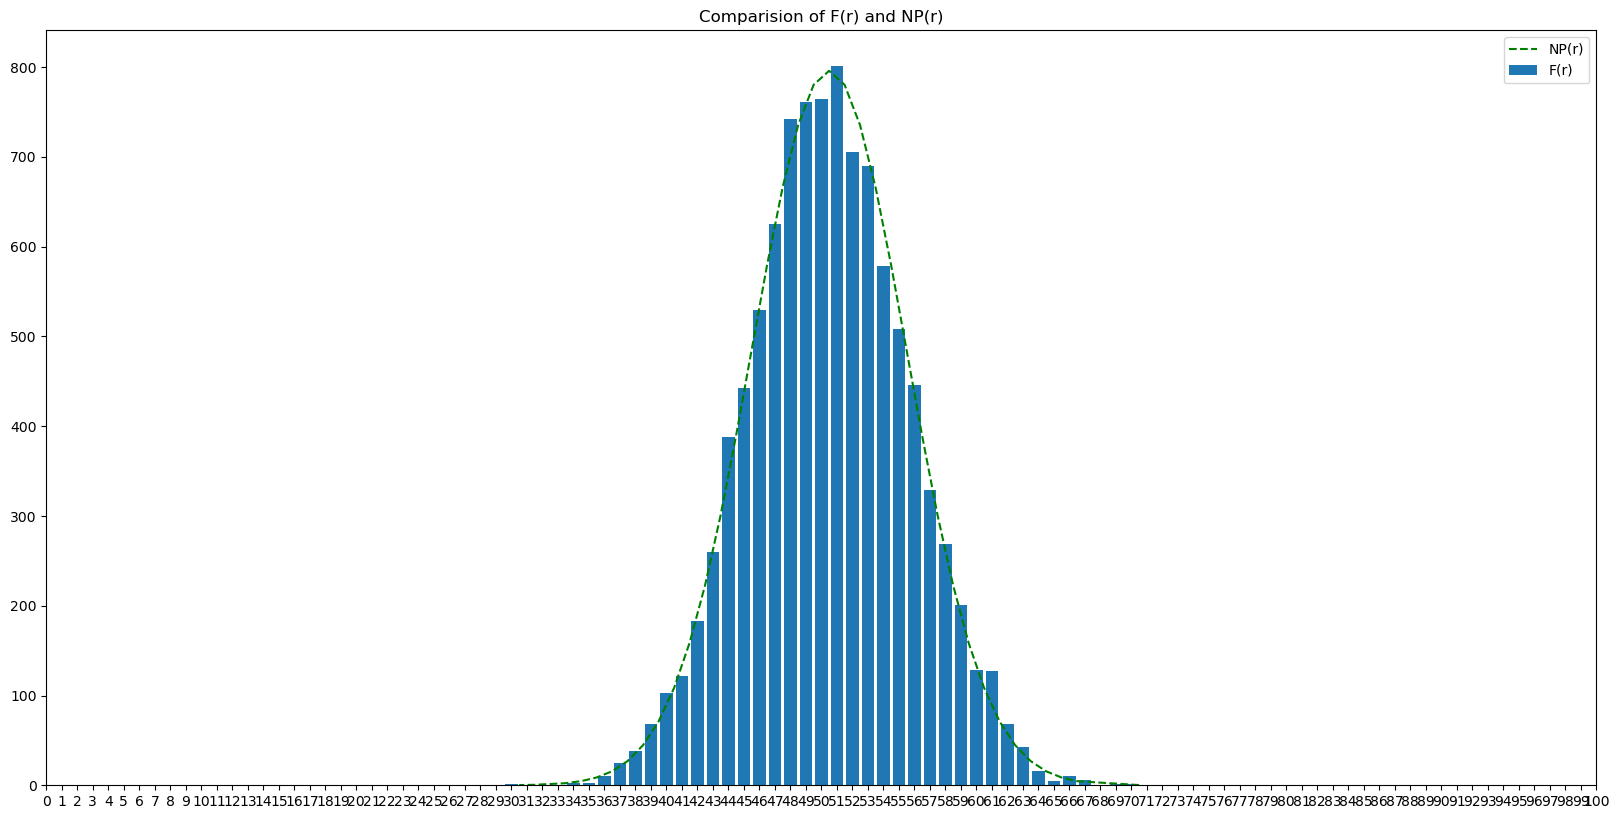

In [4]:
sample_space =[]
sample_space_sum = []
for i in range(trials) :
    sample_space.append(np.random.randint(2, size=coins+1))
for i in range(trials) :
    sample_space_sum.append(sample_space[i].sum())
sample_space_sum  = np.array(sample_space_sum)
sample_space_count = collections.Counter(sample_space_sum)
NP_r_dict = NP_r(sample_space_count, coins, trials)
plt.figure(figsize=(20,10), dpi=100)
plt.title("Comparision of F(r) and NP(r)")
plt.bar(sample_space_count.keys(), sample_space_count.values(), label = "F(r)")
plt.plot(NP_r_dict[0]+0.5, NP_r_dict[1], 'g--', label = "NP(r)")
plt.xticks(np.arange(coins+1))
plt.legend()
plt.show()

In [5]:
NP_r_dict[0], NP_r_dict[len(NP_r_dict)-1] = NP_r_dict[len(NP_r_dict)-1], NP_r_dict[0]
NP_r_dict[2], NP_r_dict[1] = NP_r_dict[1], NP_r_dict[2]
NP_r_dict[3], NP_r_dict[2] = NP_r_dict[2], NP_r_dict[3]
NP_r_dict[5], NP_r_dict[3] = NP_r_dict[3], NP_r_dict[5]

In [6]:
fields = ['#Heads Up (r)', 'Frequency F(r)', 'r!', '#Tails up (n-r)', '(n-r)!', 'NP(r)']
pd.DataFrame(np.transpose(NP_r_dict), columns = fields)

,#Heads Up (r),Frequency F(r),r!,#Tails up (n-r),(n-r)!,NP(r)
0,30.0,1.0,2.652529e+32,70.0,1.197857e+100,0.231707
1,34.0,2.0,2.952328e+38,66.0,5.443449e+92,4.581053
2,35.0,3.0,1.033315e+40,65.0,8.247651e+90,8.638557
3,36.0,10.0,3.719933e+41,64.0,1.268869e+89,15.597394
4,37.0,25.0,1.376375e+43,63.0,1.982608e+87,26.979276
5,38.0,38.0,5.230226e+44,62.0,3.146997e+85,44.728800
6,39.0,68.0,2.039788e+46,61.0,5.075802e+83,71.107323
7,40.0,103.0,8.159153e+47,60.0,8.320987e+81,108.438667
8,41.0,122.0,3.345253e+49,59.0,1.386831e+80,158.690732
9,42.0,183.0,1.405006e+51,58.0,2.350561e+78,222.922695
